# GROVER'S ALGORITHM

This program runs Grover's algorithm to find an unmarked element in an unstructured database.

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.circuit.library as qulib
from qiskit_textbook.tools import array_to_latex

M_simulator = Aer.get_backend('qasm_simulator')

### Define Algorithm Blocks 

In [2]:
def phase_oracle(n, indices, name = 'Uf (Oracle)'):

    Uf_arr = np.ones(2**n)                               # Array for diagonal elements of phase oracle
    
    for ind in indices:  
        Uf_arr[ind] = -1                                 # Apply phase of -1 to marked element in phase oracle

    qr_or = QuantumRegister(n)
    qc_or = QuantumCircuit(qr_or, name = name)
    qc_or = qc_or.compose(qulib.Diagonal(Uf_arr),qr_or)  # Creates efficient diagonal circuit for phase oracle

    return qc_or

def diffuser(n):
    qr_dif = QuantumRegister(n)
    qc_dif = QuantumCircuit(qr_dif, name = 'V (Diffuser)')
    qc_dif.h(range(n))
    qc_dif.append(phase_oracle(n,[0]),range(n))
    qc_dif.h(range(n))
    
    return qc_dif

def Grover(n, marked):
    
    indices =  [int(i,2) for i in marked]   # List of row/column indices for each marked element
    qc_grov = QuantumCircuit(n, n)

    rounds = int(np.floor(np.pi/4*np.sqrt(2**n/len(indices))))
    print(f'{n} qubits, basis states {marked} marked, {rounds} rounds')

    qc_grov.h(range(n))

    for _ in range(rounds):
        qc_grov.append(phase_oracle(n, indices), range(n))
        qc_grov.append(diffuser(n), range(n))

    qc_grov.measure(range(n), range(n))

    return qc_grov

### Select marked elems, and pass to Grover Circuit

4 qubits, basis states ['0011', '1001'] marked, 2 rounds


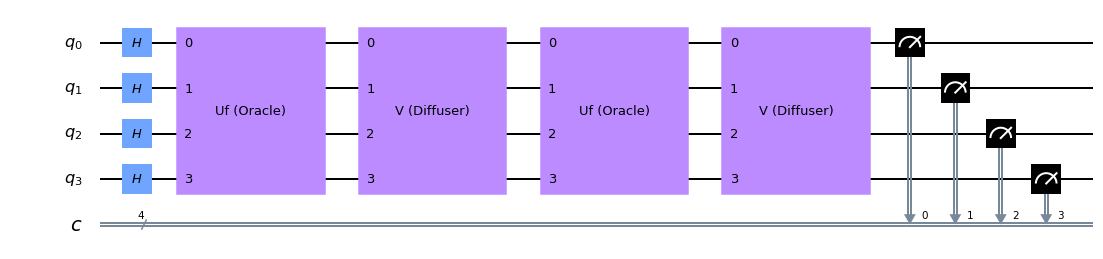

In [7]:
marked_elems = ['0011', '1001']
nbits = len(str(marked_elems[0])) 
qc_Grover = Grover(nbits, marked_elems)
qc_Grover.draw('mpl', fold = 100)

### Run Simulation

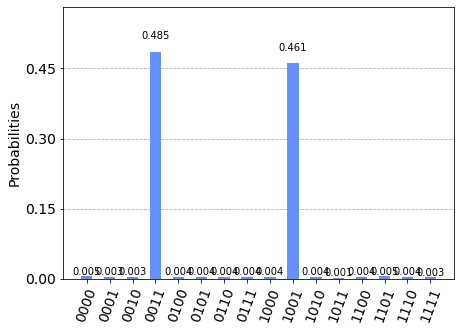

In [8]:
job = execute(qc_Grover, backend = M_simulator, shots = 2048)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)